In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [4]:
df = pd.read_csv('data/BINANCE_DOGEBUSD, 60-2.csv')
df

,time,open,high,low,close,Volume,Volume MA,RSI,CCI,Plot,Plot.1
0,1609459200,0.004683,0.004702,0.004616,0.004702,1865676.0,NaN,NaN,NaN,NaN,NaN
1,1609462800,0.004705,0.004766,0.004701,0.004727,1082226.0,NaN,NaN,NaN,NaN,NaN
2,1609466400,0.004733,0.004765,0.004733,0.004765,85161.0,NaN,NaN,NaN,NaN,NaN
3,1609470000,0.004754,0.005001,0.004754,0.004976,5030766.0,NaN,NaN,NaN,NaN,NaN
4,1609473600,0.005000,0.005001,0.004816,0.004917,5531754.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16870,1670241600,0.106720,0.106760,0.105800,0.105930,14095010.0,33668016.40,56.656069,67.917784,15.987122,19.185252
16871,1670245200,0.105920,0.106220,0.104040,0.104490,32317575.0,34485251.20,49.487025,-21.792511,13.965515,18.989910
16872,1670248800,0.104490,0.104810,0.104050,0.104560,28471456.0,34507188.55,49.819432,-20.774315,13.947687,18.886065
16873,1670252400,0.104560,0.104560,0.102000,0.102980,83304122.0,37513687.60,42.949268,-113.742046,6.001206,18.434064


In [5]:
#transform to twetts timezone -700
df['time'] = pd.to_datetime(df['time'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Us/Mountain')
df.head()

,time,open,high,low,close,Volume,Volume MA,RSI,CCI,Plot,Plot.1
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,NaN,NaN,NaN,NaN,NaN
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,NaN,NaN,NaN,NaN,NaN
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,NaN,NaN,NaN,NaN,NaN
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,NaN,NaN,NaN,NaN,NaN
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_todrop = df.iloc[:,[0,1,2,3,4,5]]
df_todrop.head()

,time,open,high,low,close,Volume
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0


In [7]:
df_todrop['percent'] = ''
df_todrop.head()

/var/folders/7k/c999ntn553zc7wvwc7jzv77r0000gn/T/ipykernel_14705/1888032433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todrop['percent'] = ''


,time,open,high,low,close,Volume,percent
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,


In [8]:
df_todrop['value'] = df_todrop['close'] - df_todrop['open']
df_todrop['percent'] = ((df_todrop['close'] - df_todrop['open'])/df_todrop['open']) * 100
df_todrop['percent'] = df_todrop['percent'].round(2)
df_todrop.head()

/var/folders/7k/c999ntn553zc7wvwc7jzv77r0000gn/T/ipykernel_14705/821773560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todrop['value'] = df_todrop['close'] - df_todrop['open']
/var/folders/7k/c999ntn553zc7wvwc7jzv77r0000gn/T/ipykernel_14705/821773560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todrop['percent'] = ((df_todrop['close'] - df_todrop['open'])/df_todrop['open']) * 100
/var/folders/7k/c999ntn553zc7wvwc7jzv77r0000gn/T/ipykernel_14705/821773560.py:3: SettingWithCopyWarning: 
A 

,time,open,high,low,close,Volume,percent,value
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083


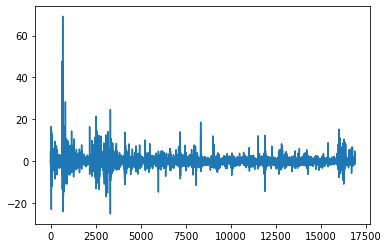

In [9]:
plt.plot(df_todrop['percent'])

In [10]:
df_todrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16875 entries, 0 to 16874
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype                      
---  ------   --------------  -----                      
 0   time     16875 non-null  datetime64[ns, US/Mountain]
 1   open     16875 non-null  float64                    
 2   high     16875 non-null  float64                    
 3   low      16875 non-null  float64                    
 4   close    16875 non-null  float64                    
 5   Volume   16875 non-null  float64                    
 6   percent  16875 non-null  float64                    
 7   value    16875 non-null  float64                    
dtypes: datetime64[ns, US/Mountain](1), float64(7)
memory usage: 1.0 MB


<AxesSubplot:xlabel='percent'>

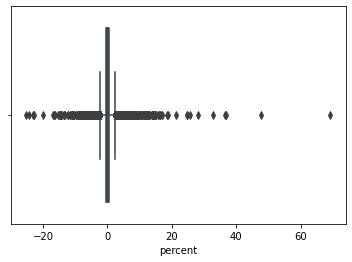

In [11]:
sns.boxplot(x=df_todrop['percent'])

<AxesSubplot:xlabel='percent', ylabel='Count'>

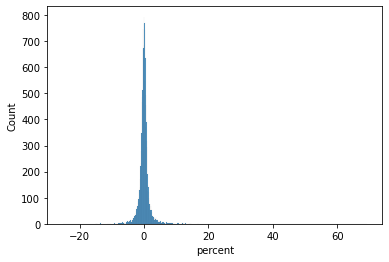

In [12]:
sns.histplot(x=df_todrop['percent'])

In [13]:
df_try = df_todrop.copy()
df_try

,time,open,high,low,close,Volume,percent,value
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083
...,...,...,...,...,...,...,...,...
16870,2022-12-05 05:00:00-07:00,0.106720,0.106760,0.105800,0.105930,14095010.0,-0.74,-0.000790
16871,2022-12-05 06:00:00-07:00,0.105920,0.106220,0.104040,0.104490,32317575.0,-1.35,-0.001430
16872,2022-12-05 07:00:00-07:00,0.104490,0.104810,0.104050,0.104560,28471456.0,0.07,0.000070
16873,2022-12-05 08:00:00-07:00,0.104560,0.104560,0.102000,0.102980,83304122.0,-1.51,-0.001580


In [14]:
#df_try['tv'] = ''
#df_try['tv'].value_counts()
#df_try.head()
#df_try.shape
#df_try.info()

In [15]:
df_try['tv']=df_try['percent'].apply(lambda x: '-1' if x<=-0.3 
                                     else '0' if x>-0.3 and x<0.3 
                                     else '1')


<AxesSubplot:xlabel='tv', ylabel='Count'>

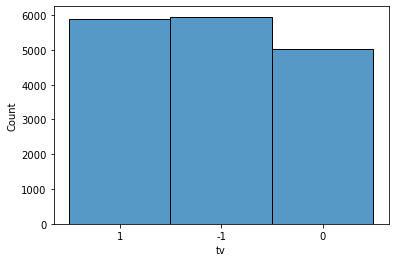

In [16]:
sns.histplot(x=df_try['tv'])


In [17]:
df_try.head()

,time,open,high,low,close,Volume,percent,value,tv
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019,1
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022,1
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032,1
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222,1
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083,-1


In [20]:

df_try.head()

,time,open,high,low,close,Volume,percent,value,tv
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019,1
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022,1
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032,1
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222,1
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083,-1


In [23]:
df_try['tv'].value_counts()

-1    5956
1     5880
0     5039
Name: tv, dtype: int64

In [24]:
#CHOOSING DATES (optional)
#df_orudates = df1.copy()
#df_orudates = df_orudates[(df_orudates['time'] > '2021-01-01') & (df_orudates['time'] < '2021-04-30')]
#df_orudates.head(50)

In [25]:
df_try.to_csv('data/dataprices_for_lstm.csv', index=False)

In [26]:
#Check
df12 = pd.read_csv('data/dataprices_for_lstm.csv')
df12

,time,open,high,low,close,Volume,percent,value,tv
0,2020-12-31 17:00:00-07:00,0.004683,0.004702,0.004616,0.004702,1865676.0,0.41,0.000019,1
1,2020-12-31 18:00:00-07:00,0.004705,0.004766,0.004701,0.004727,1082226.0,0.47,0.000022,1
2,2020-12-31 19:00:00-07:00,0.004733,0.004765,0.004733,0.004765,85161.0,0.68,0.000032,1
3,2020-12-31 20:00:00-07:00,0.004754,0.005001,0.004754,0.004976,5030766.0,4.67,0.000222,1
4,2020-12-31 21:00:00-07:00,0.005000,0.005001,0.004816,0.004917,5531754.0,-1.66,-0.000083,-1
...,...,...,...,...,...,...,...,...,...
16870,2022-12-05 05:00:00-07:00,0.106720,0.106760,0.105800,0.105930,14095010.0,-0.74,-0.000790,-1
16871,2022-12-05 06:00:00-07:00,0.105920,0.106220,0.104040,0.104490,32317575.0,-1.35,-0.001430,-1
16872,2022-12-05 07:00:00-07:00,0.104490,0.104810,0.104050,0.104560,28471456.0,0.07,0.000070,0
16873,2022-12-05 08:00:00-07:00,0.104560,0.104560,0.102000,0.102980,83304122.0,-1.51,-0.001580,-1
